<a href="https://www.kaggle.com/code/tiodaronzi3/investigate-tmdb-dataset?scriptVersionId=92706423" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Investigate TMDB Dataset

---
Github: [Investigate TMDB Dataset](https://github.com/bassamfaramawi/Investigate-TMDb-Movie-Dataset)

Kaggle: [Investigate TMDB Dataset](https://www.kaggle.com/code/tiodaronzi3/investigate-tmdb-dataset)

Auther: Bassam Faramawi

---

**Contents**
* [Introduction](#Introduction)
* [Packages](#Packages)
* [Data Wrangling](#Data_Wrangling)
    * [Explore data](#Explore_data)
    * [Data cleaning](#Data_cleaning)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
   * [Research Question 1](#Research_Question_1)
   * [Research Question 2](#Research_Question_2)
   * [Research Question 3](#Research_Question_3)
   * [Research Question 4](#Research_Question_4)
* [Conclusions](#Conclusions)


<a id='Introduction'></a> <br>
# Introduction

This data set contains information about 5,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Initially, these data are useful for both production companies and movie aficionados, so our questions should focus on both sides and how each benefit from data.

> __For filmmakers, are there a certain production companies that have found a consistent formula, which means they are always/mostly producing or participating in production of the most successful commercial movies? Is a film costing over 100 million dollars to produce can still flop or in clearer Can the producer risk producing a movie at a high cost (100m or more) with the possibility of commercial loss??__

> __For movie aficionados with different interests, can we predict which films will be highly rated whether or not they are a commerical success? What are the most popular genres among movie aficionados?And do this popular change by years?__

<a id='Packages'></a> <br>
# Packages

In [1]:
# First, we import few python packages required to investigate the dataset
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

<a id='Data_Wrangling'></a> <br>
# Data Wrangling

<a id='Explore_data'></a> <br>
### Explore data

> I will load in the data, using (read_csv) function. Dataset is downloaded from Kaggle __[here](https://www.kaggle.com/tmdb/tmdb-movie-metadata)__, in csv format('tmdb-movies.csv'). And i will check for cleanliness, and then trim and clean the dataset for analysis. 

In [2]:
# Load data into a pandas DataFrame and print out a few lines 
df = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')   
df.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [3]:
# Inspect data types and looking for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
# View clearer null values in the data
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

 >From the result, the data is consisting of 4803 enties or movies and 20 attributes between (float, int and object/string), and there is some data values is null value needed to droped from the dataframe as well as a mistake entries such as zero budget/revenue value which is not real.
Another note is that there is some columns we have no need of it in our analytices and its presence or absence doesn't affect our calculations such is __['homepage', 'overview', 'runtime','release_date', 'tagline', 'keywords']__, so will drop it totaly from the dataframe.

<a id='Data_cleaning'></a> <br>
### Data cleaning
(Droping unneeded columns, null values and mistake entries)

In [5]:
# First, drop unneeded columns and print a one line to ensure
df.drop(['homepage', 'overview', 'runtime', 'tagline', 'keywords'], axis=1, inplace=True)
df.head(1)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


In [6]:
# Then, drop rows with null values to maintain a clean data and make sure the result
df.dropna(inplace=True)
df.isnull().sum()

budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [7]:
# Drop rows with mistake budget/revenue entries
df.drop(df.query('revenue == 0 or budget == 0').index, inplace=True)

In [8]:
# Setting movie title as the index of the data for ease of indexing and for visualizations purposes
df.set_index('original_title', inplace=True)
df.head()

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count
original_title,,,,,,,,,,,,,,
Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
The Dark Knight Rises,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
John Carter,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [9]:
df.loc[:, 'production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
df['production_companies']

original_title
Avatar                                      [Ingenious Film Partners, Twentieth Century Fo...
Pirates of the Caribbean: At World's End    [Walt Disney Pictures, Jerry Bruckheimer Films...
Spectre                                                      [Columbia Pictures, Danjaq, B24]
The Dark Knight Rises                       [Legendary Pictures, Warner Bros., DC Entertai...
John Carter                                                            [Walt Disney Pictures]
                                                                  ...                        
Clerks                                                [Miramax Films, View Askew Productions]
Pink Flamingos                                                        [Dreamland Productions]
キュア                                                                           [Daiei Studios]
Primer                                                                            [Thinkfilm]
El Mariachi                                  

In [10]:
df.loc[:, 'production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
df['production_countries']

original_title
Avatar                                      [United States of America, United Kingdom]
Pirates of the Caribbean: At World's End                    [United States of America]
Spectre                                     [United Kingdom, United States of America]
The Dark Knight Rises                                       [United States of America]
John Carter                                                 [United States of America]
                                                               ...                    
Clerks                                                      [United States of America]
Pink Flamingos                                              [United States of America]
キュア                                                                            [Japan]
Primer                                                      [United States of America]
El Mariachi                                         [Mexico, United States of America]
Name: production_countries, 

In [11]:
df.loc[:, 'genres'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
df['genres']

original_title
Avatar                                      [Action, Adventure, Fantasy, Science Fiction]
Pirates of the Caribbean: At World's End                     [Adventure, Fantasy, Action]
Spectre                                                        [Action, Adventure, Crime]
The Dark Knight Rises                                    [Action, Crime, Drama, Thriller]
John Carter                                          [Action, Adventure, Science Fiction]
                                                                ...                      
Clerks                                                                           [Comedy]
Pink Flamingos                                                    [Horror, Comedy, Crime]
キュア                                                    [Crime, Horror, Mystery, Thriller]
Primer                                                 [Science Fiction, Drama, Thriller]
El Mariachi                                                     [Action, Crime, Thril

In [12]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df['release_year']

original_title
Avatar                                      2009
Pirates of the Caribbean: At World's End    2007
Spectre                                     2015
The Dark Knight Rises                       2012
John Carter                                 2012
                                            ... 
Clerks                                      1994
Pink Flamingos                              1972
キュア                                         1997
Primer                                      2004
El Mariachi                                 1992
Name: release_year, Length: 3229, dtype: int64

In [13]:
df.drop(['release_date'], axis=1, inplace=True)

<a id='Exploratory_Data_Analysis'></a> <br>
# Exploratory Data Analysis

Now that we've trimmed and cleaned the data, so lets move on to exploration. I compute statistics and create visualizations with the goal of addressing the research questions that i posed in the Introduction section.


___________________________________________________________________________________________________________________________
<a id='Research_Question_1'></a> <br>
### Research Question 1 (For filmmakers, are there certain production companies that have found a consistent formula?)

>Note that there are movies that are not active means that have not received enough voting (less than 500 votes) which will affect our conclusions, so we will select the only the movies that received more than 500 votes and work with.

In [14]:
# Select active movies and view properties of new dataframe
active_movies = df.query('vote_count >= 500')
active_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, Avatar to Primer
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1562 non-null   int64  
 1   genres                1562 non-null   object 
 2   id                    1562 non-null   int64  
 3   original_language     1562 non-null   object 
 4   popularity            1562 non-null   float64
 5   production_companies  1562 non-null   object 
 6   production_countries  1562 non-null   object 
 7   revenue               1562 non-null   int64  
 8   spoken_languages      1562 non-null   object 
 9   status                1562 non-null   object 
 10  title                 1562 non-null   object 
 11  vote_average          1562 non-null   float64
 12  vote_count            1562 non-null   int64  
 13  release_year          1562 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 183.0+ KB


 >1562 active titles we have, Surely the production companies that co-produced of top revenue of them they are the ones we want.

 >Each movie is co-produced by a group of companies, not a single company, so we need to know the companies with the largest share of the list, which will certainly be the ones that we want. To determine these companies we need to calculate the frequency of repetition of the name of each company in the list.

In [15]:
# Select top 100 revenue movies
top_100_revenue = active_movies.sort_values(by='revenue', ascending=False)[:100]

# Extract the production companies from the top 100 revenue movies to a dict type
companies_by_top100 = {}
for companies in top_100_revenue['production_companies']:
    for company in companies:
        if company in companies_by_top100:
            companies_by_top100[company] += 1 
        else: companies_by_top100[company] = 1
            
# Sort the top companies in descending order
companies_by_top100 = dict(sorted(companies_by_top100.items(), key=lambda item: item[1], reverse=True))
# convert to list of tuples 
companies_by_top100 = [(k,v) for k,v in companies_by_top100.items()]

# Top 10 companies
top_revenue_10_companies = companies_by_top100[:10]
top_revenue_10_companies

[('Warner Bros.', 15),
 ('Walt Disney Pictures', 14),
 ('Paramount Pictures', 11),
 ('Columbia Pictures', 10),
 ('Twentieth Century Fox Film Corporation', 7),
 ('Marvel Studios', 7),
 ('Amblin Entertainment', 7),
 ('Universal Pictures', 7),
 ('Revolution Sun Studios', 7),
 ('Legendary Pictures', 6)]

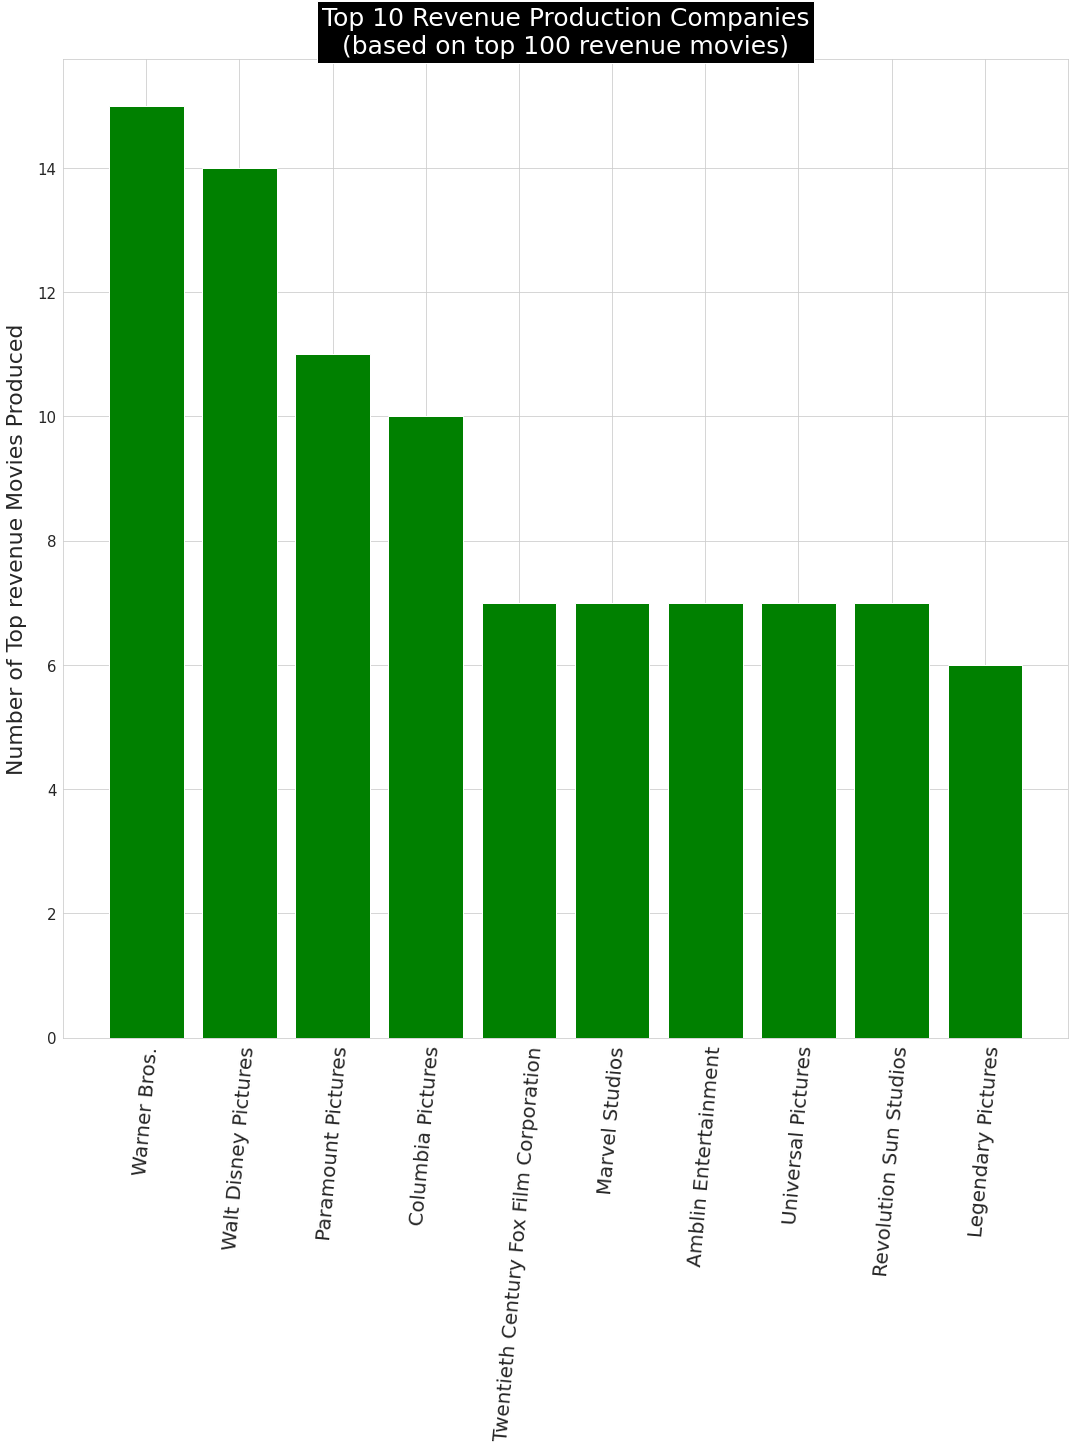

In [16]:


# Draw a bar chart of the first/top 10 companies according to their frequencies
sns.set_style('whitegrid')  # Set a style for the background of the chart
f, ax = plt.subplots(figsize=(18,18)) 
top_10 = list(zip(*top_revenue_10_companies))[0]  # The x axis is the top 10 companies names
frequancies = list(zip(*top_revenue_10_companies))[1]  # The y axis is the frequancies(number of the movies produced from top 100)
x_label = top_10  # Names of the companies
plt.xticks(rotation=85, fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel("Number of Top revenue Movies Produced", fontsize = 22, labelpad = 10)
plt.title('Top 10 Revenue Production Companies\n(based on top 100 revenue movies)' ,bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
ax.bar(top_10, frequancies, align = 'center', color='g');

 >"Warner Bros." is the top production company of all the production companies with 15 movie co-produced from the top 100 revenue movies all the time, followed by "Walt Disney Pictures" by 14 movies co-produced, then "Paramount Pictures" with 11 movie co-produced.
 
 
_________________________________________________________________________________________________________________________
<a id='Research_Question_2'></a> <br>
### Research Question 2  (For filmmakers, is a film costing over $100M to produce can still flop?)

 > Can the producer risk producing a movie at a high cost ($ 100 million or more) with the possibility of commercial loss?
   > Failed commercially movies means that its reward revenue is less than than its costed budget, so lets extract the commercially failed movies that costed 100m or more from our data and take a closer look.

In [17]:
# Select the movies which budget more than 100m and revenue less thna budget
budget100m_failed_movies = active_movies.query('budget >= 1.0e+08 and revenue < budget')[['release_year', 'production_companies', 'budget','revenue']]

# Adding a new columns containing the revenue-budget proportion
budget100m_failed_movies['revenue_prop'] = budget100m_failed_movies.revenue/budget100m_failed_movies.budget

# Sort the movies by revenue proportion in ascending order
budget100m_failed_movies.sort_values(by='revenue_prop', inplace=True)
budget100m_failed_movies

,release_year,production_companies,budget,revenue,revenue_prop
original_title,,,,,
The Lone Ranger,2013,"[Walt Disney Pictures, Jerry Bruckheimer Films...",255000000,89289910,0.350157
Australia,2008,"[Bazmark Films, Ingenious Film Partners, Twent...",130000000,49554002,0.381185
The 13th Warrior,1999,[Touchstone Pictures],160000000,61698899,0.385618
Flushed Away,2006,"[Aardman Animations, DreamWorks Animation]",149000000,64459316,0.432613
R.I.P.D.,2013,"[Universal Pictures, Original Film, Dark Horse...",130000000,61648500,0.474219
Around the World in 80 Days,2004,"[Studio Babelsberg, Walden Media, Babelsberg F...",110000000,72178895,0.656172
Treasure Planet,2002,"[Walt Disney Pictures, Walt Disney Feature Ani...",140000000,109578115,0.782701
Catwoman,2004,"[Village Roadshow Pictures, DiNovi Pictures, W...",100000000,82102379,0.821024
Pan,2015,"[Warner Bros., Moving Picture Company (MPC), B...",150000000,128388320,0.855922


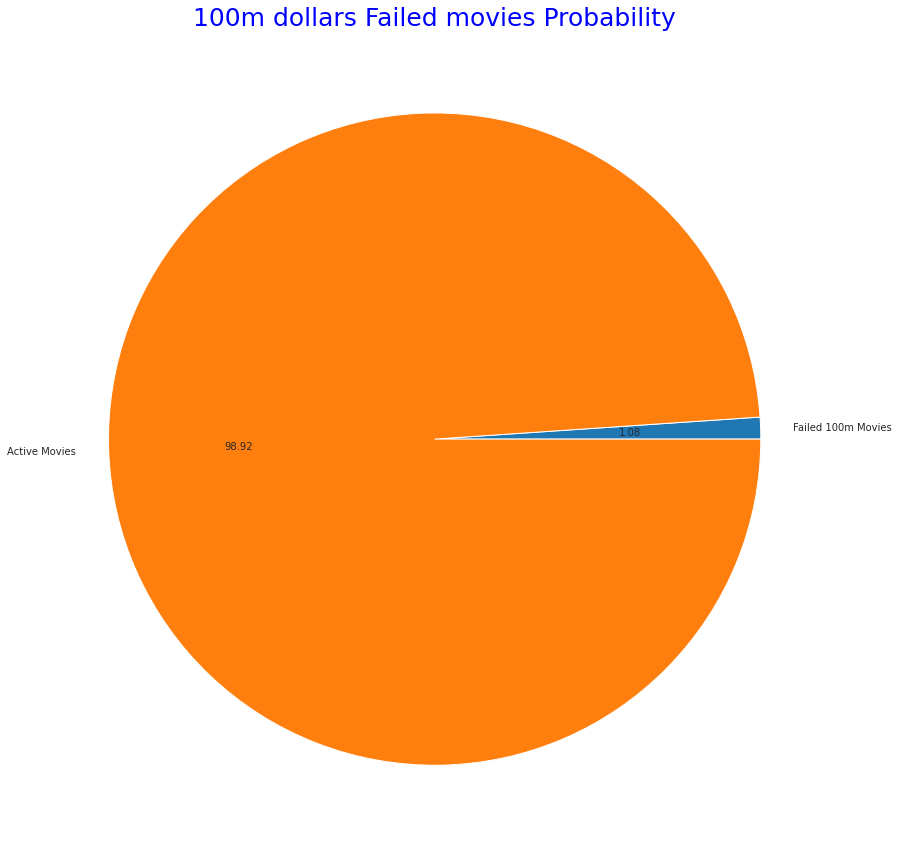

In [18]:
# Draw a pie chart to view the percentage/probability of 100m failed movies
f, ax = plt.subplots(figsize=(15,15))
plt.title('100m dollars Failed movies Probability', color='b',fontsize = 25)
plt.pie([len(budget100m_failed_movies), len(active_movies)], labels= ['Failed 100m Movies', 'Active Movies'] ,autopct='%.2f');

 > From pie clear that that the percentage of 100m failed movies is so weak (0.92%), so the probability of a commercial loss of producing a 100m dollars movie is so weak.

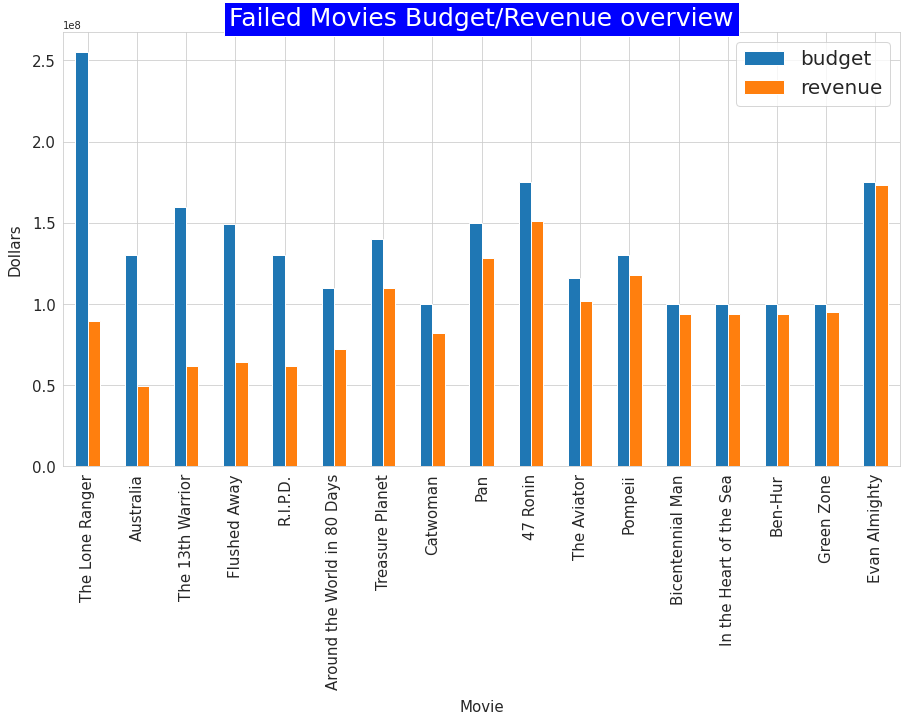

In [19]:
# Draw a bar chart to get encloser to the revenue-budget ratio of 100m failed movies
budget100m_failed_movies[['budget','revenue']].plot(kind='bar', figsize=(15,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Dollars", fontsize = 15, labelpad = 10)
plt.xlabel("Movie", fontsize = 15, labelpad = 10)
plt.legend(prop={'size': 20})
plt.title('Failed Movies Budget/Revenue overview' ,bbox={'facecolor':'b', 'pad':5},color='w',fontsize = 25);


____________________________________________________________________________________________________________________________
<a id='Research_Question_3'></a> <br>
### Research Question 3 (For movie aficionados, can we predict which films will be highly rated whether or not they are a commerical success?)

 >I need to know the nature of the relationship between the rates of the commerically successful movies and its revenue (an inverse or reverse relationship or no rlationship between them).
 First we drop the 10 failed movies from the data, then sort the data by vote_average in a descending order.

In [20]:
active_movies.drop(budget100m_failed_movies.index, inplace=True)

sorted_by_vote = active_movies.sort_values(by='vote_average', ascending=False)
sorted_by_vote.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,spoken_languages,status,title,vote_average,vote_count,release_year
original_title,,,,,,,,,,,,,,
The Shawshank Redemption,25000000,"[Drama, Crime]",278,en,136.747729,[Castle Rock Entertainment],[United States of America],28341469,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Shawshank Redemption,8.5,8205,1994
The Godfather,6000000,"[Drama, Crime]",238,en,143.659698,"[Paramount Pictures, Alfran Productions]",[United States of America],245066411,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Godfather,8.4,5893,1972
千と千尋の神隠し,15000000,"[Fantasy, Adventure, Animation, Family]",129,ja,118.968562,[Studio Ghibli],[Japan],274925095,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Spirited Away,8.3,3840,2001
Schindler's List,22000000,"[Drama, History, War]",424,en,104.469351,"[Universal Pictures, Amblin Entertainment]",[United States of America],321365567,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,Schindler's List,8.3,4329,1993
The Godfather: Part II,13000000,"[Drama, Crime]",240,en,105.792936,"[Paramount Pictures, The Coppola Company]",[United States of America],47542841,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Godfather: Part II,8.3,3338,1974


 >Then plot a histogram of the vote_average and the revenue to get the relationship between them visualized clearly.

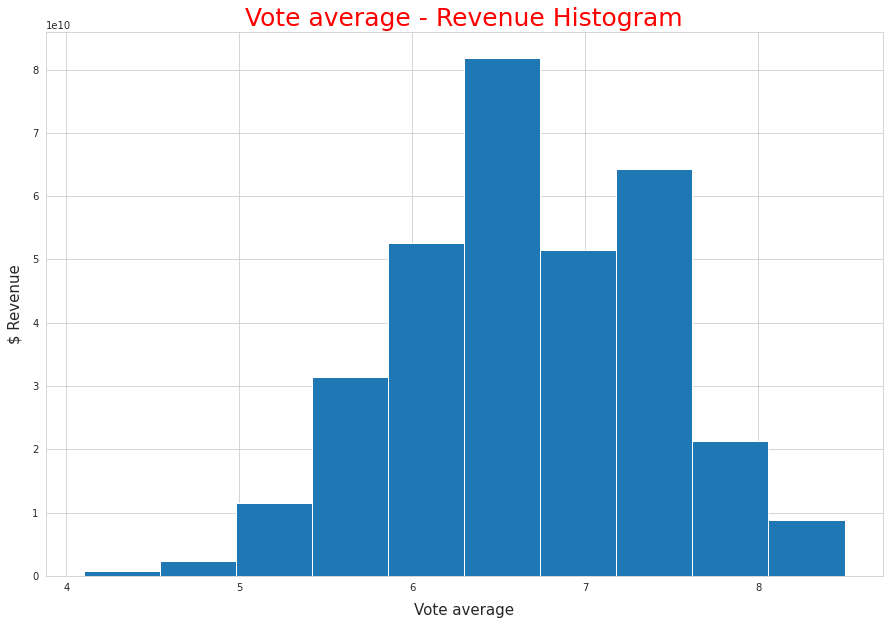

In [21]:
f, ax = plt.subplots(figsize=(15,10)) 
plt.ylabel("$ Revenue", fontsize = 15, labelpad = 10)
plt.xlabel("Vote average", fontsize = 15, labelpad = 10)
plt.title('Vote average - Revenue Histogram', color='r',fontsize = 25)
ax.hist(sorted_by_vote.vote_average, weights=sorted_by_vote.revenue);

 >__Here we note the histogram is like (or mostly) left skewed, So it's likely that high-revenue movies are also often rated as high ratings by movies aficionados.__

 >We also note that there are some movies rated higher than 8 but had not got revenue of 100 million, which is:

In [22]:
sorted_by_vote.query('vote_average>= 8 and revenue < 1.0e+08')

,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,spoken_languages,status,title,vote_average,vote_count,release_year
original_title,,,,,,,,,,,,,,
The Shawshank Redemption,25000000,"[Drama, Crime]",278,en,136.747729,[Castle Rock Entertainment],[United States of America],28341469,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Shawshank Redemption,8.5,8205,1994
The Godfather: Part II,13000000,"[Drama, Crime]",240,en,105.792936,"[Paramount Pictures, The Coppola Company]",[United States of America],47542841,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Godfather: Part II,8.3,3338,1974
Whiplash,3300000,[Drama],244786,en,192.528841,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],13092000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Whiplash,8.3,4254,2014
Psycho,806948,"[Drama, Horror, Thriller]",539,en,93.067866,"[Paramount Pictures, Universal Pictures, Shaml...",[United States of America],32000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Psycho,8.2,2320,1960
七人の侍,2000000,"[Action, Drama]",346,ja,39.756748,[Toho Company],[Japan],271841,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Seven Samurai,8.2,878,1954
12 Angry Men,350000,[Drama],389,en,59.259204,"[United Artists, Orion-Nova Productions]",[United States of America],1000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,12 Angry Men,8.2,2078,1957
GoodFellas,25000000,"[Drama, Crime]",769,en,63.654244,[Winkler Films],[United States of America],46836394,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,GoodFellas,8.2,3128,1990
American History X,20000000,[Drama],73,en,73.567232,"[New Line Cinema, The Turman-Morrissey Company...",[United States of America],23875127,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,American History X,8.2,3016,1998
"Il buono, il brutto, il cattivo",1200000,[Western],429,it,88.377076,"[United Artists, Constantin Film Produktion, P...","[United States of America, Italy, Spain, Germany]",6000000,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}]",Released,"The Good, the Bad and the Ugly",8.1,2311,1966


 > 26 movies (including the top rated movie "The Shawshank Redemption") did not achieve high revenue.
 
 __________________________________________________________________________________________________________________
<a id='Research_Question_4'></a> <br>
### Research Question 4  (Which is the most popular genres between movies aficionados?)

 > To answer this question, should select the top popular movies from data according to the 'popularity' column, and extract the list of the different genres of the top popular movies, then calculate the frequency of each genre repeated from the 'genres' coumn using our previously defined 'count_word' method, then try to use a smart way to visualize data to be more clear to detect every genre popularity.

In [23]:
df.describe()

,budget,id,popularity,revenue,vote_average,vote_count,release_year
count,3.229000e+03,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,44780.705791,29.033689,1.212430e+08,6.309353,977.287395,2001.680396
std,4.439674e+07,74609.434723,36.165730,1.863029e+08,0.873891,1414.309577,13.279525
min,1.000000e+00,5.000000,0.019984,5.000000e+00,0.000000,0.000000,1916.000000
25%,1.050000e+07,4958.000000,10.446722,1.700000e+07,5.800000,178.000000,1998.000000
50%,2.500000e+07,11451.000000,20.410354,5.518472e+07,6.300000,471.000000,2005.000000
75%,5.500000e+07,45272.000000,37.335721,1.462920e+08,6.900000,1148.000000,2010.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,8.500000,13752.000000,2016.000000


> The popularity between  min 0.019 and max 875.6 and mean = 29 and half of movies have popularity under 20.4 so we will consider the movie is popular if above 5 popularity.

In [24]:
# Will consider the movie is popular if its popularity is more than 5.0 
top_popular_movies = df.query('popularity >= 5.0')
top_popular_movies

,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,spoken_languages,status,title,vote_average,vote_count,release_year
original_title,,,,,,,,,,,,,,
Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009
Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007
Spectre,245000000,"[Action, Adventure, Crime]",206647,en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015
The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",49026,en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012
John Carter,260000000,"[Action, Adventure, Science Fiction]",49529,en,43.926995,[Walt Disney Pictures],[United States of America],284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Super Size Me,65000,"[Documentary, Comedy, Drama]",9372,en,10.400603,[Kathbur Pictures],[United States of America],28575078,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Super Size Me,6.6,506,2004
The Signal,4000000,"[Thriller, Science Fiction]",242095,en,27.662696,"[Automatik Entertainment, Low Spark Films, Sig...",[United States of America],600896,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Signal,5.8,631,2014
Clerks,27000,[Comedy],2292,en,19.748658,"[Miramax Films, View Askew Productions]",[United States of America],3151130,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Clerks,7.4,755,1994


In [25]:
# Extract the genres from the top popular movies to a dict type
top_populars_genres = {}
for genres in top_popular_movies['genres']:
    for genre in genres:
        if genre in top_populars_genres:
            top_populars_genres[genre] += 1 
        else: top_populars_genres[genre] = 1
            
# Sort the top popular genres in descending order
top_populars_genres = dict(sorted(top_populars_genres.items(), key=lambda item: item[1], reverse=True))
# convert to list of lists 
top_populars_genres = [[k,v] for k,v in top_populars_genres.items()]
top_populars_genres

[['Drama', 1246],
 ['Comedy', 967],
 ['Thriller', 881],
 ['Action', 847],
 ['Adventure', 620],
 ['Romance', 487],
 ['Crime', 486],
 ['Science Fiction', 399],
 ['Family', 338],
 ['Fantasy', 326],
 ['Horror', 313],
 ['Mystery', 245],
 ['Animation', 181],
 ['History', 117],
 ['War', 101],
 ['Music', 88],
 ['Western', 49],
 ['Documentary', 17]]

 >__Now we have got the genres frequencies, and as genres is a words so we will use a WordCloud to visualize it smartly, and the size and color of each genre will vary according to the genre frequency/popularity__

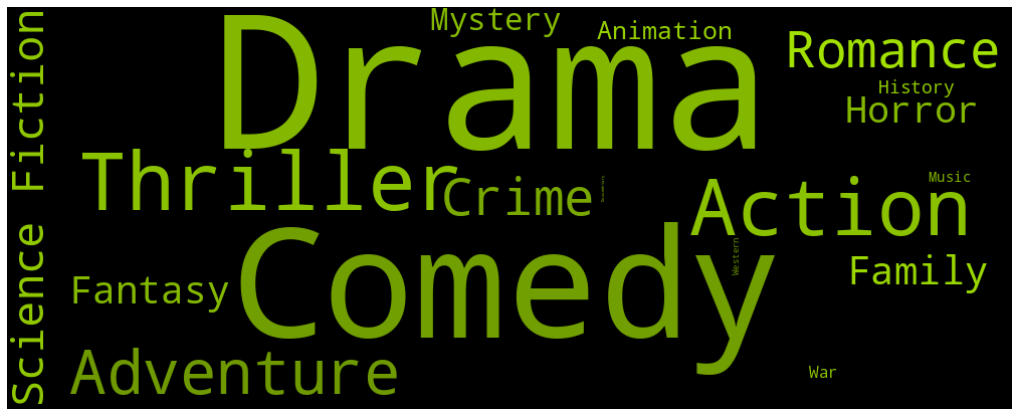

In [26]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = top_populars_genres
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=400, background_color='black', 
                      max_words=100,relative_scaling=0.8,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)

f, ax = plt.subplots(figsize=(18,18))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis('off');

 >__From the wordcloud we noted that Drama movies, Action movies, Comedy movies, Thriller movies then Adventure movies is the most popilar genres between movie aficionados they prefer to watch.__
 
 <a id='conclusions'></a> <br>
# Conclusions

Finally, We have encountered some difficulties here, such as the incomplete or corrupting of some of the values in the data and the lack of others or some of the data entered wrongly and unrealistically.

 __We have tried to answer some of the questions that may be important to both filmmakers and movie aficionados:__

 __Companies ('Warner Bros.', Walt Disney Pictures', 'Paramount Pictures', 'Lucasfilm', 'Universal Pictures') respectively are the companies with the largest share of successful films, which reached the successful formula in how to produce a film that succeeds commercially. At the same time we found it difficult to produce a film with a budget exceeding $ 100 million and then the film fails commercially. It definitely concerns producers. Movies know you so dare or make a decision to produce a high-budget movie.__
 __We also know that films that are commercially successful often get a high rating afterwards by movie aficionados.
We have found that drama, action, comedian, thriller and fantasy movies are the most popular films among film aficionados, and it is important to know filmmakers to see the general taste among movie buffs.__